# Stats for delexed lexicon (Section 5.1)

In [2]:
%load_ext autoreload
%autoreload

In [3]:
import numpy as np
import pandas as pd

from induction import *

In [6]:
from pathlib import Path
base_path = Path('../parsing/output')

## Lexemes

In [7]:
lex_params = pd.read_csv(base_path / 'induce' / 'lex_parameters.csv')

In [8]:
lexeme_count = len(lex_params) - 3 # 3 fillers
empty_lexeme_count = len(lex_params[lex_params['nodes'].isna()])
non_empty_lexeme_count = lexeme_count - empty_lexeme_count
print(f'total:\t\t{lexeme_count}\nempty:\t\t{empty_lexeme_count}\nnon-empty:\t{non_empty_lexeme_count}')

total:		510832
empty:		36283
non-empty:	474549


In [9]:
lex_single_token = lex_params[~lex_params['tokens'].str.contains(' ')]
len(lex_single_token)

76096

In [10]:
by_token = lex_params.groupby('tokens').size().sort_values(ascending=False)
by_token.describe()

count    36284.000000
mean        14.078795
std         11.618462
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max        916.000000
dtype: float64

In [11]:
tmpl_params = pd.read_csv(base_path / 'induce' / 'tmpl_parameters.csv')

In [13]:
syncat_sizes = tmpl_params.groupby('syncat').size().sort_values(ascending=False)
print(syncat_sizes.describe())
# syncat_sizes.iloc[:20].plot(kind='bar').get_figure().savefig('output/fig-syncat_template_distribution_unfiltered.pdf')

count       181.000000
mean      24928.779006
std       93965.077789
min           1.000000
25%          25.000000
50%         178.000000
75%        2339.000000
max      780696.000000
dtype: float64


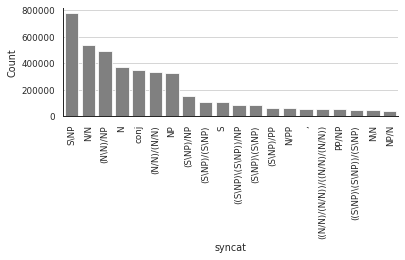

In [43]:
# Print-quality plot
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme('paper')
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 2))
ax.set_xlabel('Syntactic Category')
ax.set_ylabel('Count')
plt.xticks(rotation = 90)

data = syncat_sizes.iloc[:20]

sns.despine()
sns.barplot(x=data.index, y=data, color='grey')
ax.grid(axis='y')

import tikzplotlib

tikzplotlib.save("fig-syncat_template_distribution_unfiltered.tex", axis_width='12cm', axis_height='4cm', extra_axis_parameters=['xmajorticks=true', 'ymajorticks=true'])

plt.show()


# After EM filtering

In [ ]:
lexemes = pd.read_csv(base_path / 'induce' / 'lexemes.txt', header=None, names=['id', 'lemma', 'concept', 'constant', 'role'])

Compute the number of empty / non-empty lexemes

In [ ]:
lexeme_count = len(lexemes)
empty_lexeme_count = len(lexemes[lexemes['concept'].isna() & lexemes['constant'].isna() & lexemes['role'].isna()])
non_empty_lexeme_count = lexeme_count - empty_lexeme_count
print(f'total:\t\t{lexeme_count}\nempty:\t\t{empty_lexeme_count}\nnon-empty:\t{non_empty_lexeme_count}')

total:		6389
empty:		5772
non-empty:	617
